In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from matplotlib import dates as mpl_dates
from sklearn.preprocessing import LabelEncoder

In [65]:
time_col, value_col = 'time', 'value'
data_file='sensor.csv'
date_col,sensor_value_col = 'timestamp','sensor_00'
col_dict = {date_col: time_col,sensor_value_col: value_col }

In [66]:
df=pd.read_csv(data_file,parse_dates=[date_col])
df= df.rename(columns=col_dict)
df=df.set_index(time_col, drop=True)

In [69]:
df.head(10)

Unnamed: 0     value  sensor_01  sensor_02  sensor_03  \
time                                                                         
2018-04-01 00:00:00           0  2.465394   47.09201    53.2118  46.310760   
2018-04-01 00:01:00           1  2.465394   47.09201    53.2118  46.310760   
2018-04-01 00:02:00           2  2.444734   47.35243    53.2118  46.397570   
2018-04-01 00:03:00           3  2.460474   47.09201    53.1684  46.397568   
2018-04-01 00:04:00           4  2.445718   47.13541    53.2118  46.397568   
2018-04-01 00:05:00           5  2.453588   47.09201    53.1684  46.397568   
2018-04-01 00:06:00           6  2.455556   47.04861    53.1684  46.397568   
2018-04-01 00:07:00           7  2.449653   47.13541    53.1684  46.397568   
2018-04-01 00:08:00           8  2.463426   47.09201    53.1684  46.397568   
2018-04-01 00:09:00           9  2.445718   47.17882    53.1684  46.397568   

                     sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  \
time                                                                         
2018-04-01 00:00:00   634.3750   76.45975   13.41146   16.13136   15.56713   
2018-04-01 00:01:00   634.3750   76.45975   13.41146   16.13136   15.56713   
2018-04-01 00:02:00   638.8889   73.54598   13.32465   16.03733   15.61777   
2018-04-01 00:03:00   628.1250   76.98898   13.31742   16.24711   15.69734   
2018-04-01 00:04:00   636.4583   76.58897   13.35359   16.21094   15.69734   
2018-04-01 00:05:00   637.6157   78.18568   13.41146   16.16753   15.89265   
2018-04-01 00:06:00   633.3333   75.81614   13.43316   16.13136   15.65393   
2018-04-01 00:07:00   630.6713   75.77331   13.25231   16.12413   16.19647   
2018-04-01 00:08:00   631.9444   74.58916   13.28848   16.13136   15.47309   
2018-04-01 00:09:00   641.7823   74.57428   13.38252   16.24711   15.61777   

                     ...  sensor_43  sensor_44  sensor_45  sensor_46  \
time                 ...                                               
2018-04-01 00:00:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:01:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:02:00  ...   41.66666  39.351852   65.39352   51.21528   
2018-04-01 00:03:00  ...   40.88541  39.062500   64.81481   51.21528   
2018-04-01 00:04:00  ...   41.40625  38.773150   65.10416   51.79398   
2018-04-01 00:05:00  ...   42.70833  38.773150   63.65741   51.79398   
2018-04-01 00:06:00  ...   43.22916  38.194440   61.92130   51.79398   
2018-04-01 00:07:00  ...   42.96875  38.194443   59.60648   50.92593   
2018-04-01 00:08:00  ...   42.18750  38.194440   57.87037   50.63657   
2018-04-01 00:09:00  ...   41.66666  39.062500   56.42361   50.63657   

                     sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
time                                                                         
2018-04-01 00:00:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:01:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:02:00  38.194443   155.9606   67.12963   241.3194   203.7037   
2018-04-01 00:03:00  38.194440   155.9606   66.84028   240.4514   203.1250   
2018-04-01 00:04:00  38.773150   158.2755   66.55093   242.1875   201.3889   
2018-04-01 00:05:00  38.773150   164.6412   66.55093   241.6088   201.6782   
2018-04-01 00:06:00  39.062500   171.8750   67.70834   240.1620   200.2315   
2018-04-01 00:07:00  39.351850   178.5301   68.57639   241.3194   201.0995   
2018-04-01 00:08:00  39.351850   182.0023   69.44444   243.0556   201.6782   
2018-04-01 00:09:00  39.062500   186.6319   69.73380   246.5278   200.8102   

                     machine_status  
time                                 
2018-04-01 00:00:00          NORMAL  
2018-04-01 00:01:00          NORMAL  
2018-04-01 00:02:00          NORMAL  
2018-04-01 00:03:00          NORMAL  
2018-04-01 00:04:00          NORMAL  
2018-04-01 00:05:00          NORMAL  
2018-04-01 00:06:00          NORMAL  
201

In [70]:
df.isna().sum()

Unnamed: 0             0
value              10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16
sensor_38             27


In [71]:
df = df.drop(['Unnamed: 0','sensor_15','sensor_50'],axis=1)

In [72]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [73]:
missing_data(df)

Total   Percent
sensor_51       15383  6.982117
value           10208  4.633261
sensor_07        5451  2.474129
sensor_08        5107  2.317992
sensor_06        4798  2.177741
sensor_09        4595  2.085603
sensor_01         369  0.167484
sensor_30         261  0.118464
sensor_29          72  0.032680
sensor_32          68  0.030864
sensor_17          46  0.020879
sensor_18          46  0.020879
sensor_22          41  0.018609
sensor_25          36  0.016340
sensor_16          31  0.014070
sensor_47          27  0.012255
sensor_40          27  0.012255
sensor_49          27  0.012255
sensor_38          27  0.012255
sensor_39          27  0.012255
sensor_42          27  0.012255
sensor_41          27  0.012255
sensor_48          27  0.012255
sensor_43          27  0.012255
sensor_44          27  0.012255
sensor_45          27  0.012255
sensor_46          27  0.012255
sensor_14          21  0.009532
sensor_26          20  0.009078
sensor_02          19  0.008624
sensor_03          19  0.008624
sensor_04          19  0.008624
sensor_05          19  0.008624
sensor_10          19  0.008624
sensor_11          19  0.008624
sensor_12          19  0.008624
sensor_13          19  0.008624
sensor_28          16  0.007262
sensor_31          16  0.007262
sensor_19          16  0.007262
sensor_20          16  0.007262
sensor_21          16  0.007262
sensor_23          16  0.007262
sensor_24          16  0.007262
sensor_37          16  0.007262
sensor_36          16  0.007262
sensor_35          16  0.007262
sensor_34          16  0.007262
sensor_33          16  0.007262
sensor_27          16  0.007262
machine_status      0  0.000000

In [94]:
sensors=df.columns
for col in sensors:
    df[col] = df[col].fillna(df[col].mean())

In [95]:
missing_data(df)

Total  Percent
value               0      0.0
sensor_39           0      0.0
sensor_29           0      0.0
sensor_30           0      0.0
sensor_31           0      0.0
sensor_32           0      0.0
sensor_33           0      0.0
sensor_34           0      0.0
sensor_35           0      0.0
sensor_36           0      0.0
sensor_37           0      0.0
sensor_38           0      0.0
sensor_40           0      0.0
sensor_27           0      0.0
sensor_41           0      0.0
sensor_42           0      0.0
sensor_43           0      0.0
sensor_44           0      0.0
sensor_45           0      0.0
sensor_46           0      0.0
sensor_47           0      0.0
sensor_48           0      0.0
sensor_49           0      0.0
sensor_51           0      0.0
sensor_28           0      0.0
sensor_26           0      0.0
sensor_01           0      0.0
sensor_12           0      0.0
sensor_02           0      0.0
sensor_03           0      0.0
sensor_04           0      0.0
sensor_05           0      0.0
sensor_06           0      0.0
sensor_07           0      0.0
sensor_08           0      0.0
sensor_09           0      0.0
sensor_10           0      0.0
sensor_11           0      0.0
sensor_13           0      0.0
sensor_25           0      0.0
sensor_14           0      0.0
sensor_16           0      0.0
sensor_17           0      0.0
sensor_18           0      0.0
sensor_19           0      0.0
sensor_20           0      0.0
sensor_21           0      0.0
sensor_22           0      0.0
sensor_23           0      0.0
sensor_24           0      0.0
machine_status      0      0.0

In [76]:
df.head(10)

value  sensor_01  sensor_02  sensor_03  sensor_04  \
time                                                                        
2018-04-01 00:00:00  2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00  2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00  2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00  2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00  2.445718   47.13541    53.2118  46.397568   636.4583   
2018-04-01 00:05:00  2.453588   47.09201    53.1684  46.397568   637.6157   
2018-04-01 00:06:00  2.455556   47.04861    53.1684  46.397568   633.3333   
2018-04-01 00:07:00  2.449653   47.13541    53.1684  46.397568   630.6713   
2018-04-01 00:08:00  2.463426   47.09201    53.1684  46.397568   631.9444   
2018-04-01 00:09:00  2.445718   47.17882    53.1684  46.397568   641.7823   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
time                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   
2018-04-01 00:05:00   78.18568   13.41146   16.16753   15.89265   15.16204   
2018-04-01 00:06:00   75.81614   13.43316   16.13136   15.65393   15.08247   
2018-04-01 00:07:00   75.77331   13.25231   16.12413   16.19647   15.08247   
2018-04-01 00:08:00   74.58916   13.28848   16.13136   15.47309   15.11863   
2018-04-01 00:09:00   74.57428   13.38252   16.24711   15.61777   15.11863   

                     ...  sensor_42  sensor_43  sensor_44  sensor_45  \
time                 ...                                               
2018-04-01 00:00:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:01:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:02:00  ...  31.770830   41.66666  39.351852   65.39352   
2018-04-01 00:03:00  ...  31.510420   40.88541  39.062500   64.81481   
2018-04-01 00:04:00  ...  31.510420   41.40625  38.773150   65.10416   
2018-04-01 00:05:00  ...  31.250000   42.70833  38.773150   63.65741   
2018-04-01 00:06:00  ...  31.510420   43.22916  38.194440   61.92130   
2018-04-01 00:07:00  ...  31.510416   42.96875  38.194443   59.60648   
2018-04-01 00:08:00  ...  31.510416   42.18750  38.194440   57.87037   
2018-04-01 00:09:00  ...  31.510416   41.66666  39.062500   56.42361   

                     sensor_46  sensor_47  sensor_48  sensor_49  sensor_51  \
time                                                                         
2018-04-01 00:00:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:01:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:02:00   51.21528  38.194443   155.9606   67.12963   203.7037   
2018-04-01 00:03:00   51.21528  38.194440   155.9606   66.84028   203.1250   
2018-04-01 00:04:00   51.79398  38.773150   158.2755   66.55093   201.3889   
2018-04-01 00:05:00   51.79398  38.773150   164.6412   66.55093   201.6782   
2018-04-01 00:06:00   51.79398  39.062500   171.8750   67.70834   200.2315   
2018-04-01 00:07:00   50.92593  39.351850   178.5301   68.57639   201.0995   
2018-04-01 00:08:00   50.63657  39.351850   182.0023   69.44444   201.6782   
2018-04-01 00:09:00   50.63657  39.062500   186.6319   69.73380   200.8102   

                     machine_status  
time                                 
2018-04-01 00:00:00          NORMAL  
2018-04-01 00:01:00          NORMAL  
2018-04-01 00:02:00          NORMAL  
2018-04-01 00:03:00          NORMAL  
2018-04-01 00:04:00          NORMAL  
2018-04-01 00:05:00          NORMAL  
2018-04-01 00:06:00          NORMAL  
2018-04-01 00:07:0

In [77]:
df.columns

Index(['value', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_51',
       'machine_status'],
      dtype='object')

In [78]:
df.values


array([[2.465394, 47.09201, 53.2118, ..., 67.70834, 201.3889, 'NORMAL'],
       [2.465394, 47.09201, 53.2118, ..., 67.70834, 201.3889, 'NORMAL'],
       [2.444734, 47.35243, 53.2118, ..., 67.12963, 203.7037, 'NORMAL'],
       ...,
       [2.396528, 47.699649810790994, 50.52083, ..., 155.3819, 232.0602,
        'NORMAL'],
       [2.406366, 47.699649810790994, 50.5208320617676, ..., 153.9352,
        234.0856, 'NORMAL'],
       [2.396528, 47.699649810790994, 50.5208320617676, ..., 150.463,
        234.0856, 'NORMAL']], dtype=object)

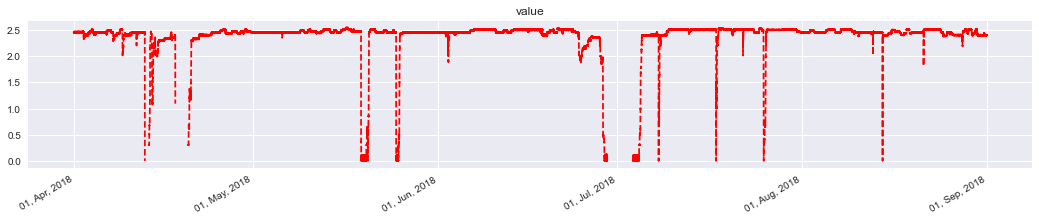

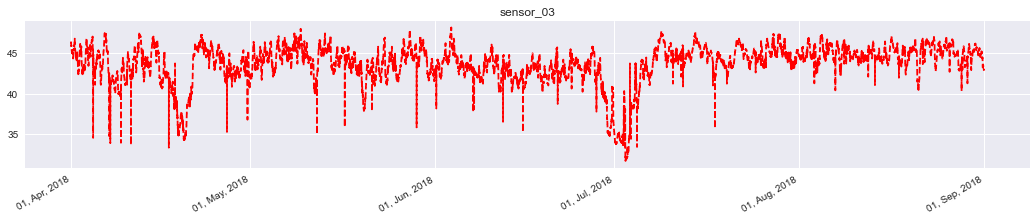

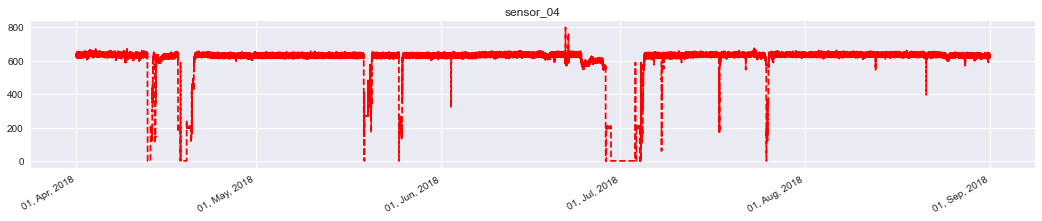

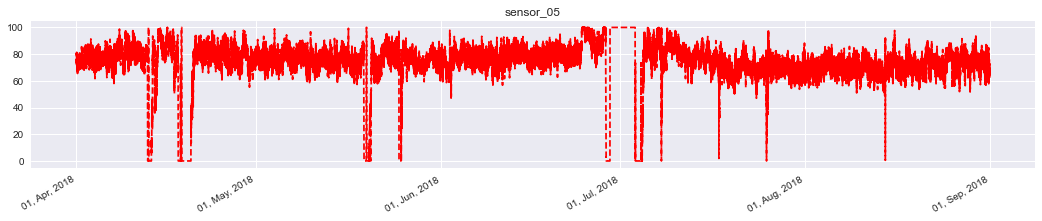

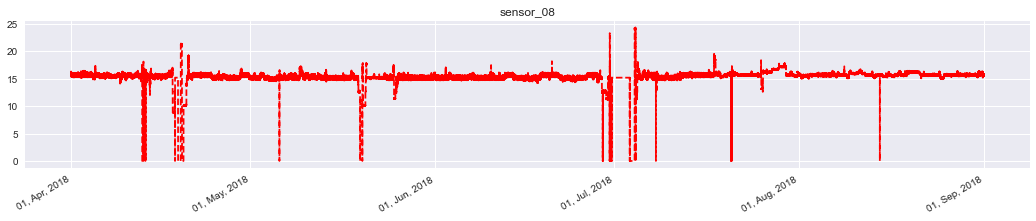

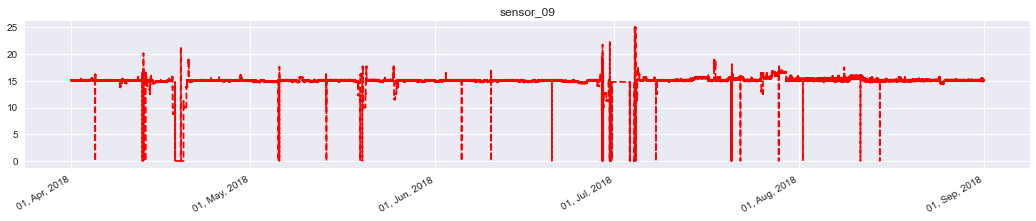

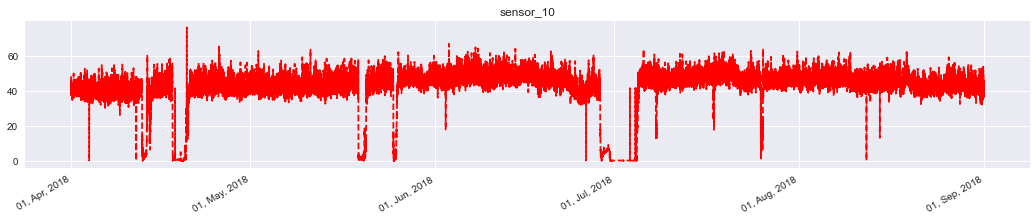

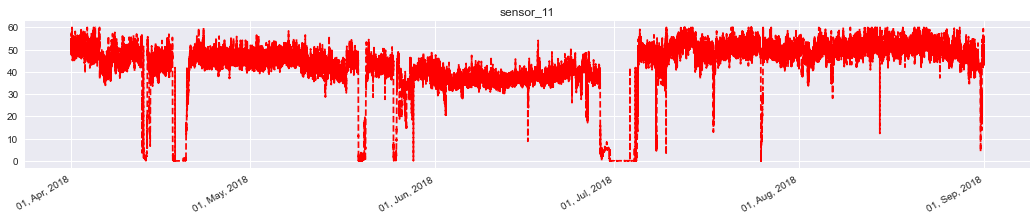

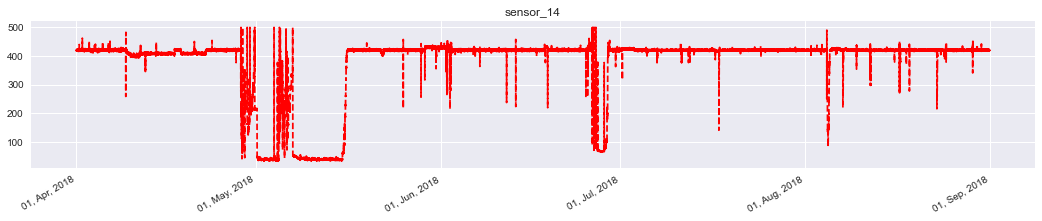

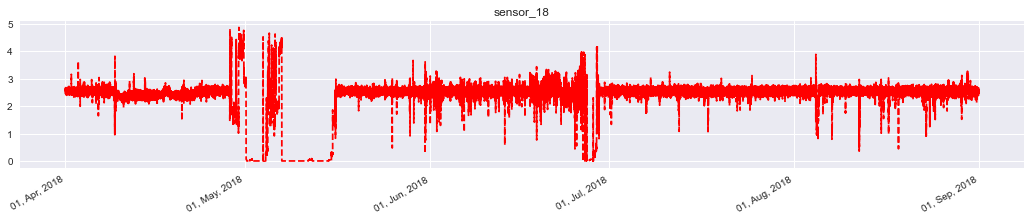

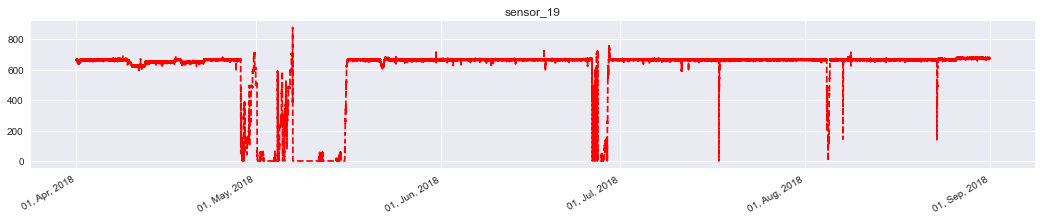

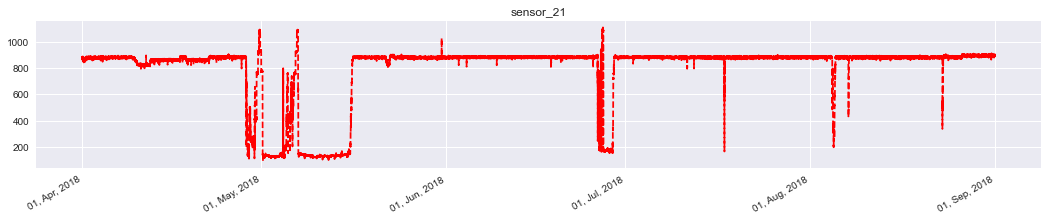

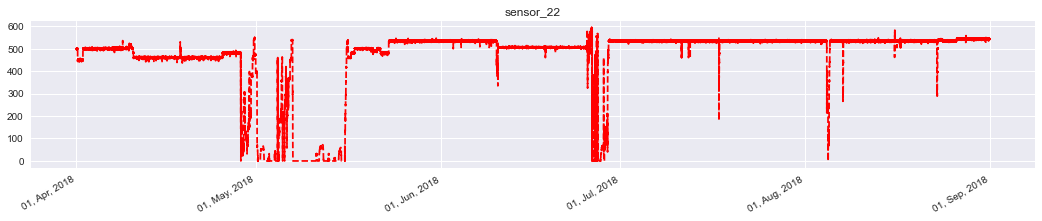

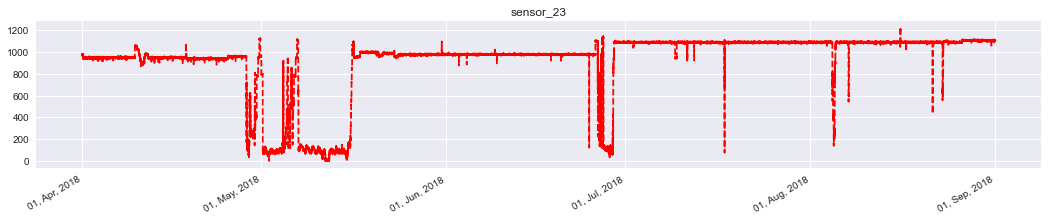

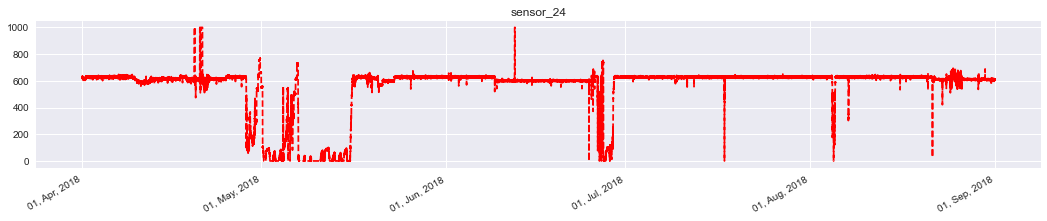

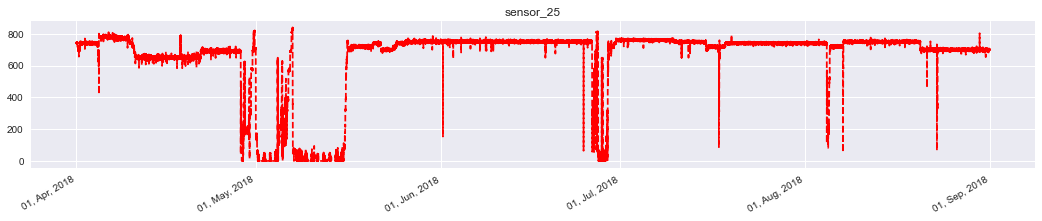

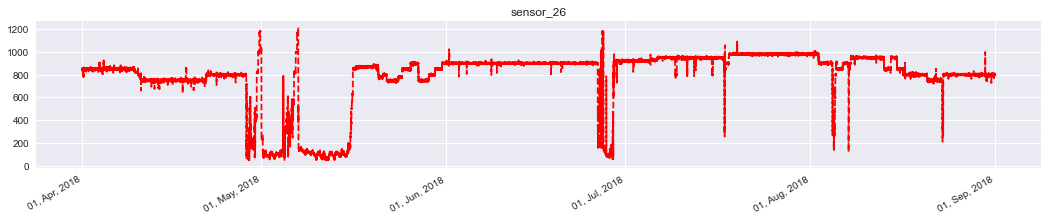

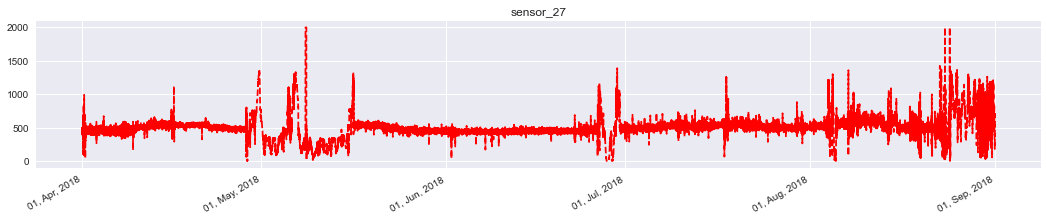

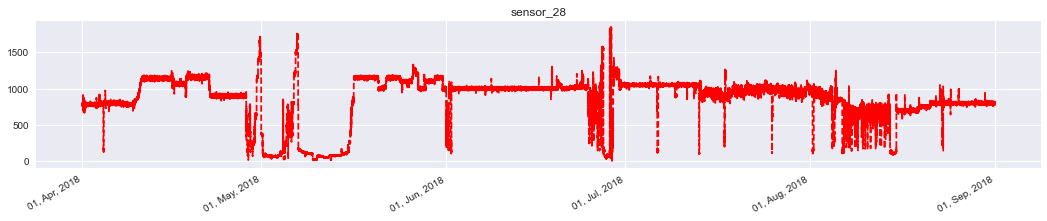

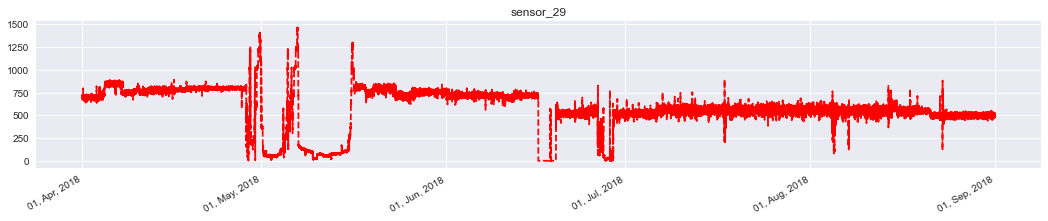

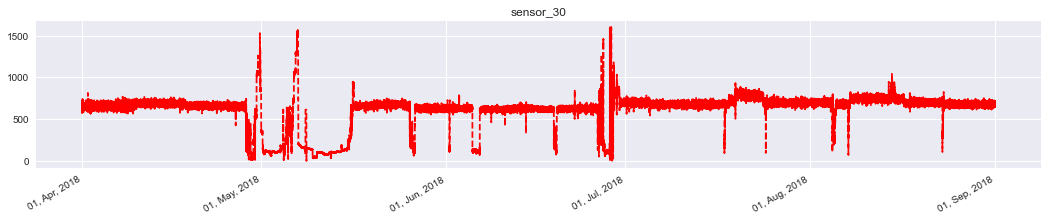

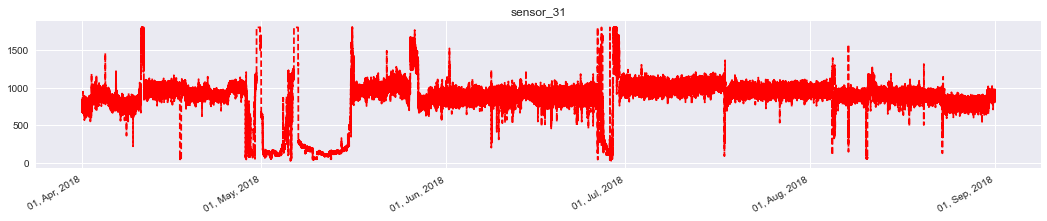

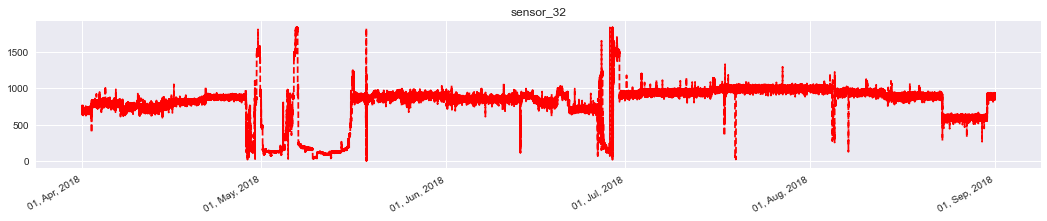

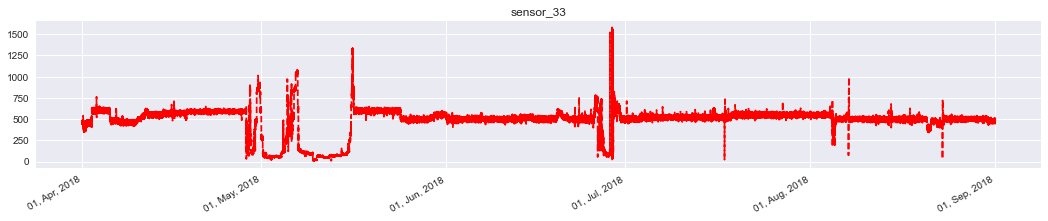

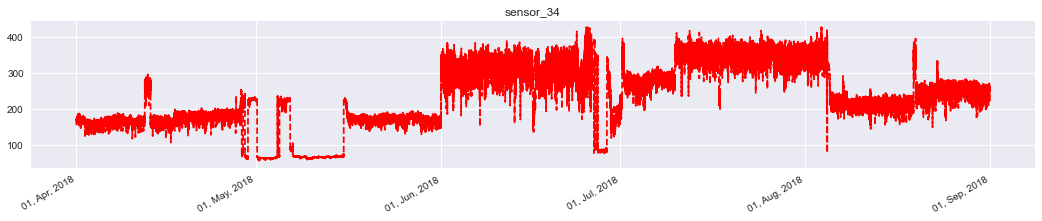

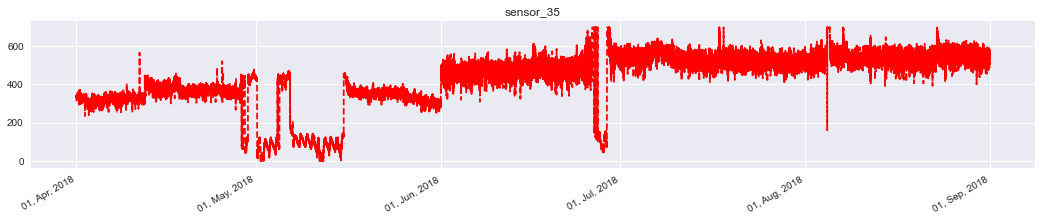

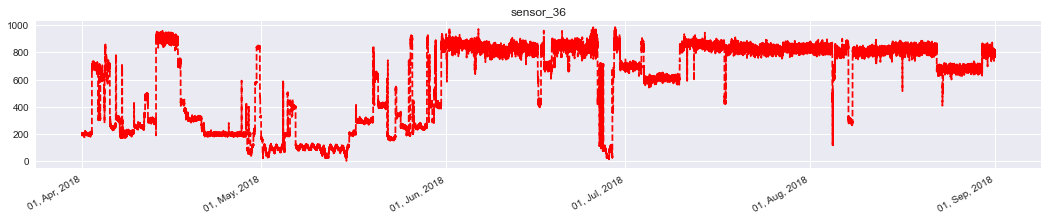

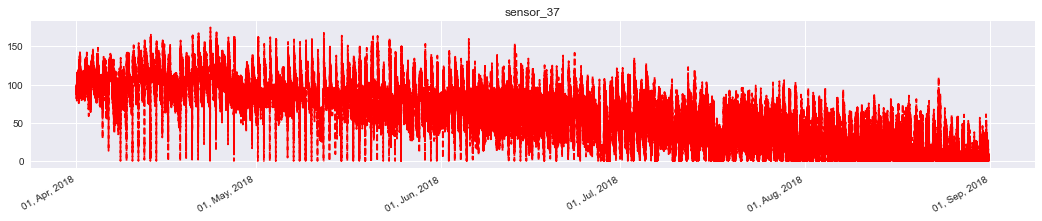

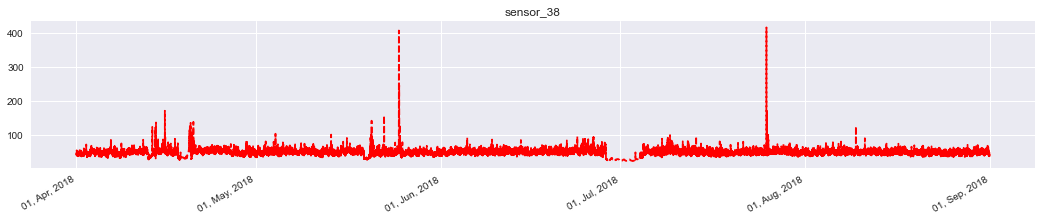

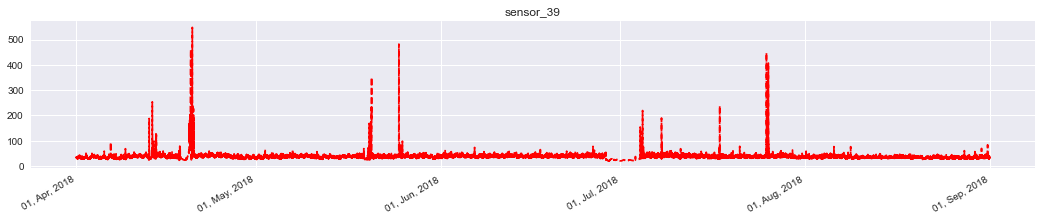

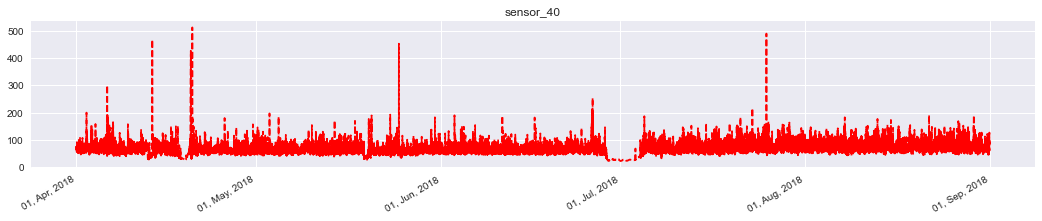

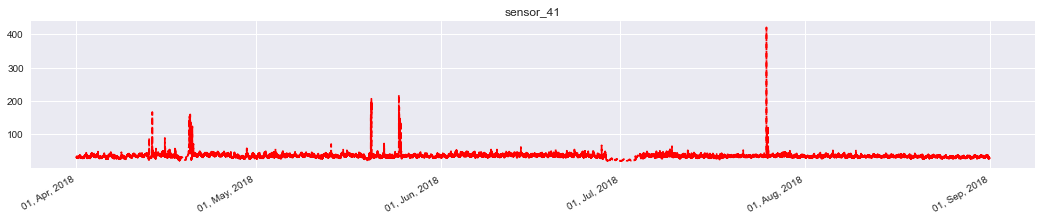

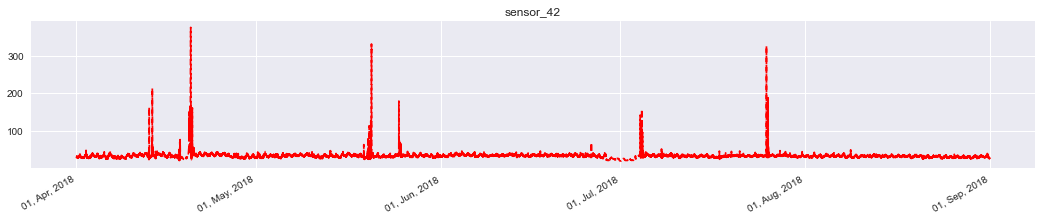

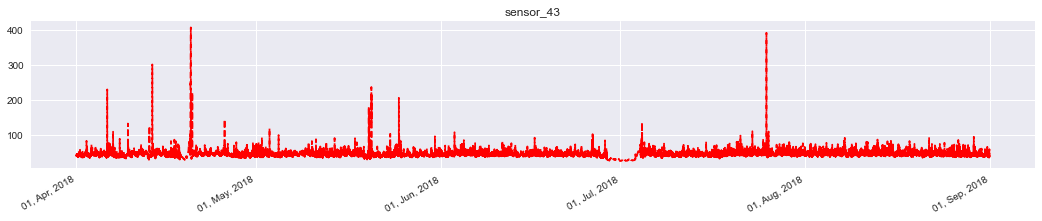

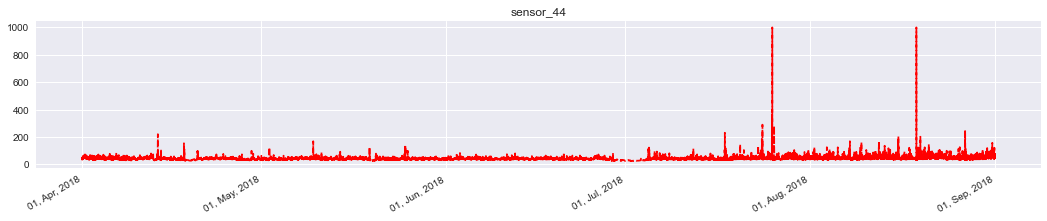

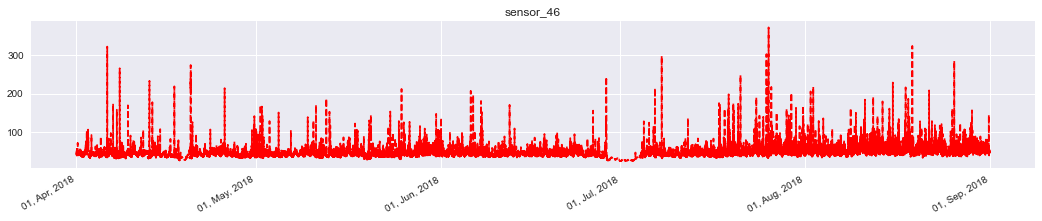

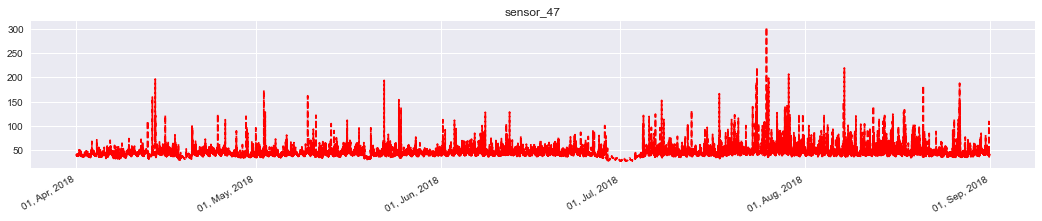

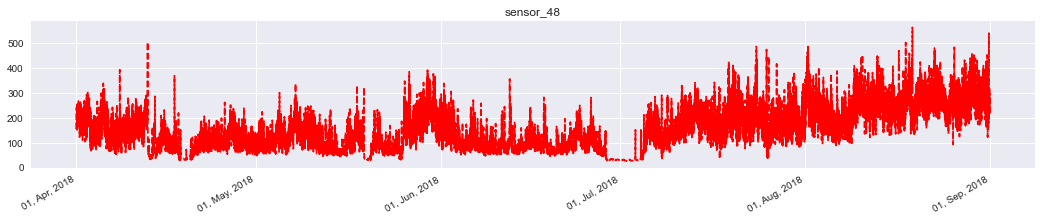

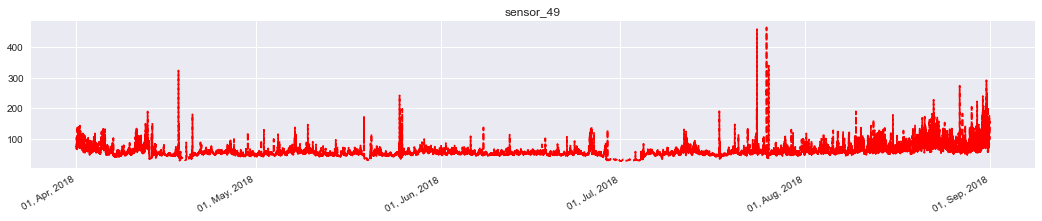

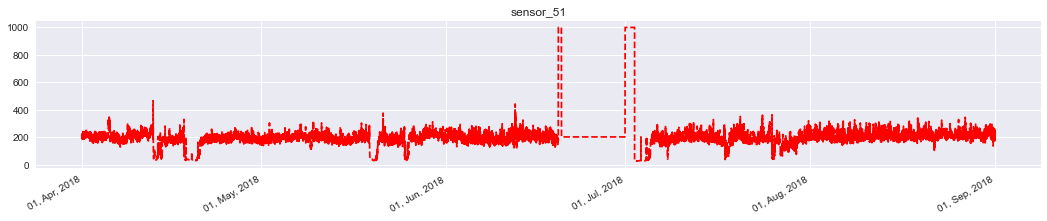

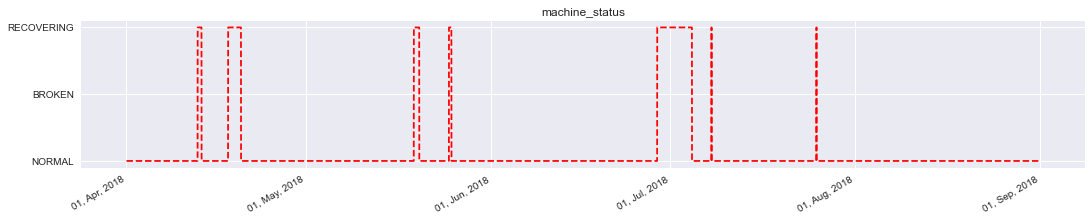

In [79]:

# specify columns to plot


dfmachine = df.drop(['machine_status'], axis=1)
sensors=df.columns
for sensor in sensors:
    plt.figure(figsize=(18,3))
    plt.plot(df[sensor], color='red',linestyle='--')
    plt.title(sensor)
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.show()

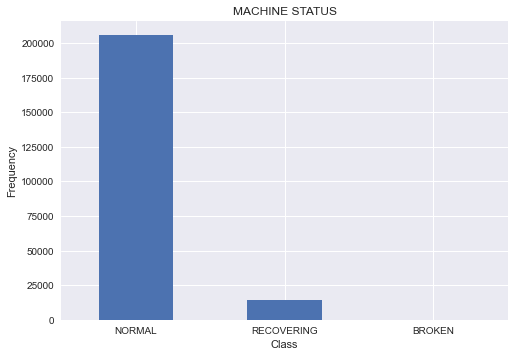

In [80]:
count_classes = pd.value_counts(df['machine_status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("MACHINE STATUS")
plt.xticks(range(3))
plt.xlabel("Class")
plt.ylabel("Frequency");

In [81]:
df['machine_status'].unique()
df['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [82]:
df.head(5)

value  sensor_01  sensor_02  sensor_03  sensor_04  \
time                                                                        
2018-04-01 00:00:00  2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00  2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00  2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00  2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00  2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
time                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_42  sensor_43  sensor_44  sensor_45  \
time                 ...                                               
2018-04-01 00:00:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:01:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:02:00  ...  31.770830   41.66666  39.351852   65.39352   
2018-04-01 00:03:00  ...  31.510420   40.88541  39.062500   64.81481   
2018-04-01 00:04:00  ...  31.510420   41.40625  38.773150   65.10416   

                     sensor_46  sensor_47  sensor_48  sensor_49  sensor_51  \
time                                                                         
2018-04-01 00:00:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:01:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:02:00   51.21528  38.194443   155.9606   67.12963   203.7037   
2018-04-01 00:03:00   51.21528  38.194440   155.9606   66.84028   203.1250   
2018-04-01 00:04:00   51.79398  38.773150   158.2755   66.55093   201.3889   

                     machine_status  
time                                 
2018-04-01 00:00:00          NORMAL  
2018-04-01 00:01:00          NORMAL  
2018-04-01 00:02:00          NORMAL  
2018-04-01 00:03:00          NORMAL  
2018-04-01 00:04:00          NORMAL  

[5 rows x 51 columns]

In [83]:
le = LabelEncoder()
df['machine_status']= le.fit_transform(df['machine_status'])


In [84]:
df.head()


value  sensor_01  sensor_02  sensor_03  sensor_04  \
time                                                                        
2018-04-01 00:00:00  2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00  2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00  2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00  2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00  2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
time                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_42  sensor_43  sensor_44  sensor_45  \
time                 ...                                               
2018-04-01 00:00:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:01:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:02:00  ...  31.770830   41.66666  39.351852   65.39352   
2018-04-01 00:03:00  ...  31.510420   40.88541  39.062500   64.81481   
2018-04-01 00:04:00  ...  31.510420   41.40625  38.773150   65.10416   

                     sensor_46  sensor_47  sensor_48  sensor_49  sensor_51  \
time                                                                         
2018-04-01 00:00:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:01:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:02:00   51.21528  38.194443   155.9606   67.12963   203.7037   
2018-04-01 00:03:00   51.21528  38.194440   155.9606   66.84028   203.1250   
2018-04-01 00:04:00   51.79398  38.773150   158.2755   66.55093   201.3889   

                     machine_status  
time                                 
2018-04-01 00:00:00               1  
2018-04-01 00:01:00               1  
2018-04-01 00:02:00               1  
2018-04-01 00:03:00               1  
2018-04-01 00:04:00               1  

[5 rows x 51 columns]

In [85]:
df['machine_status'].unique()
df['machine_status'].value_counts()

1    205836
2     14477
0         7
Name: machine_status, dtype: int64

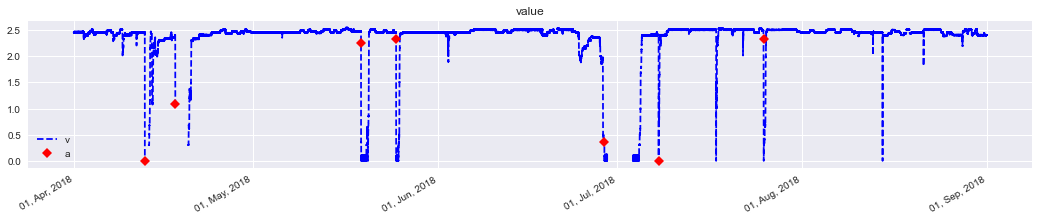

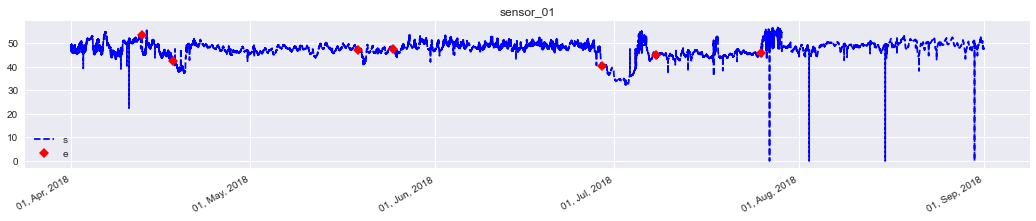

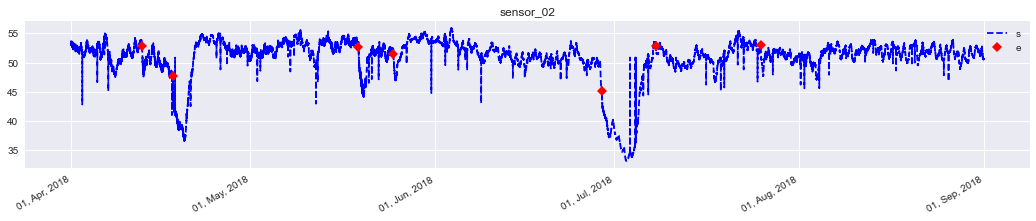

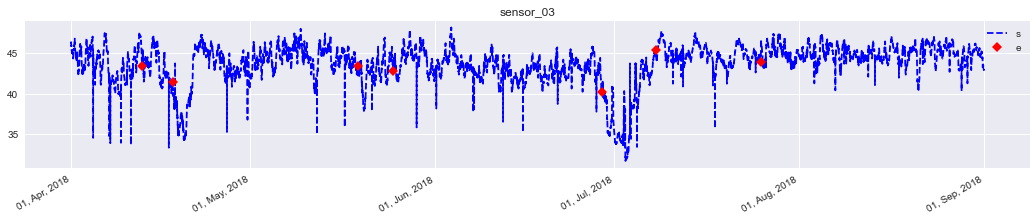

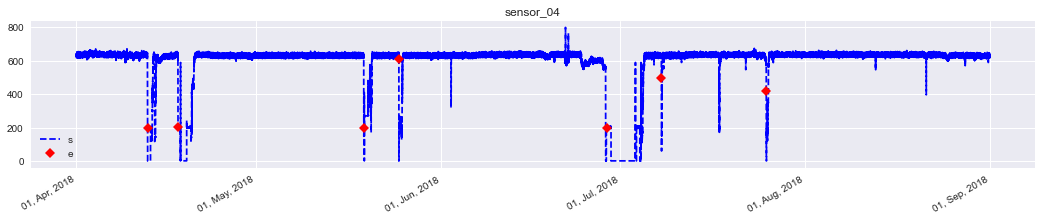

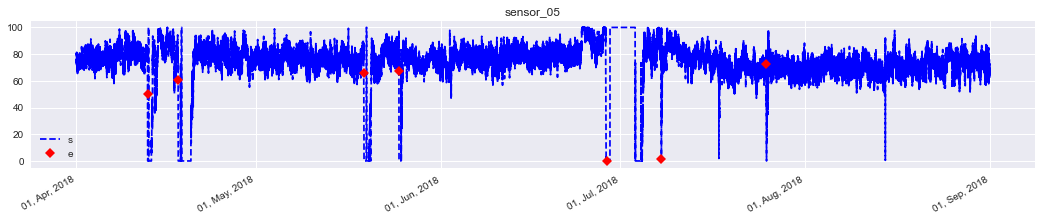

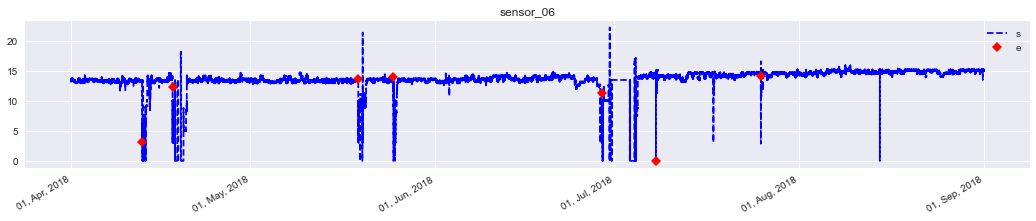

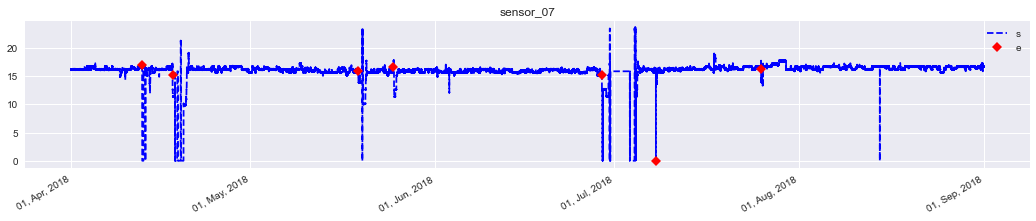

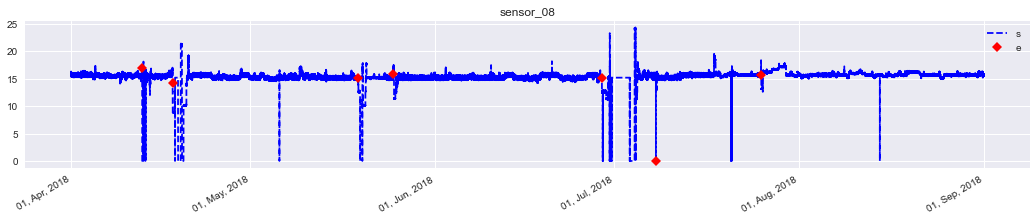

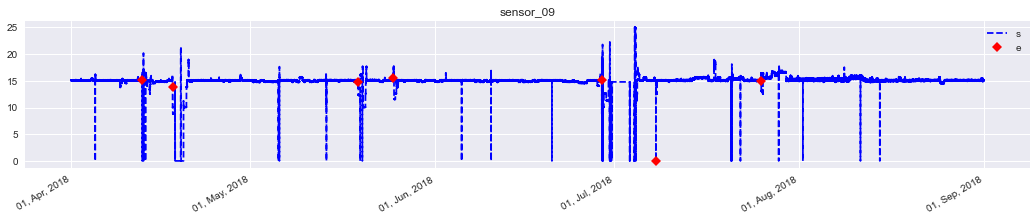

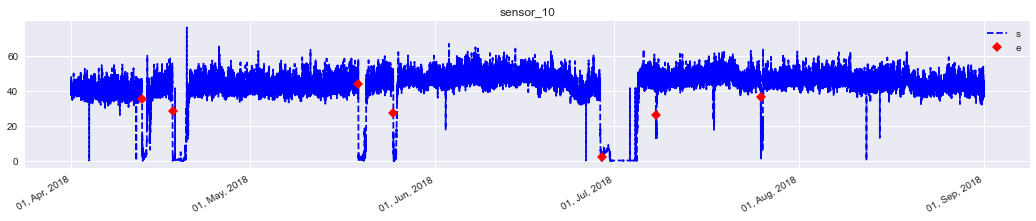

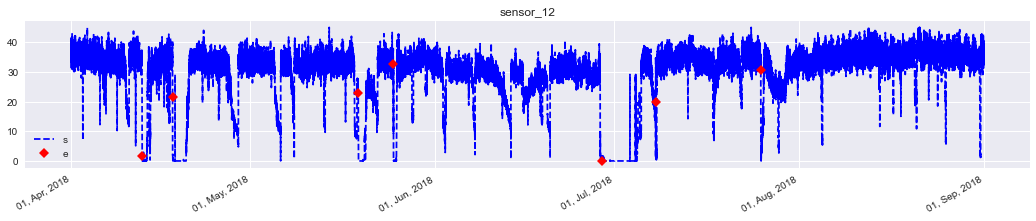

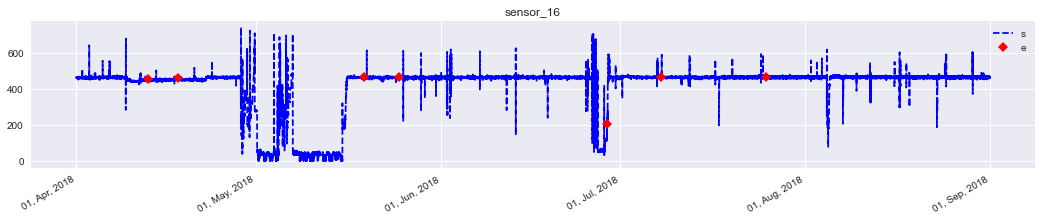

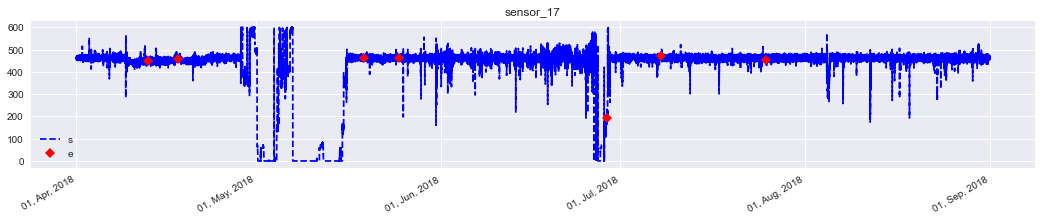

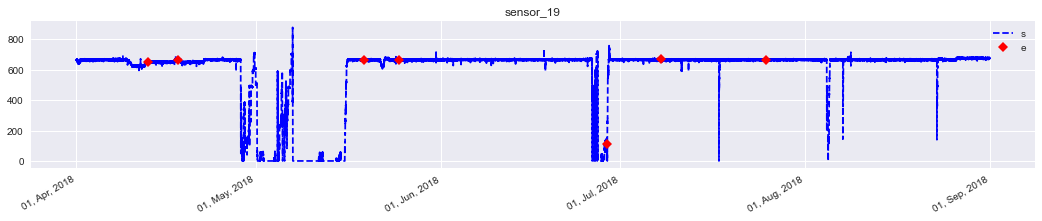

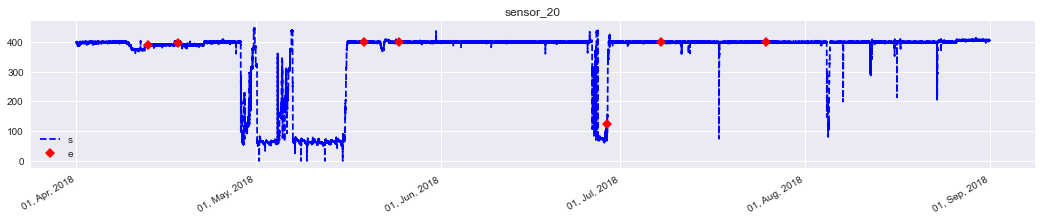

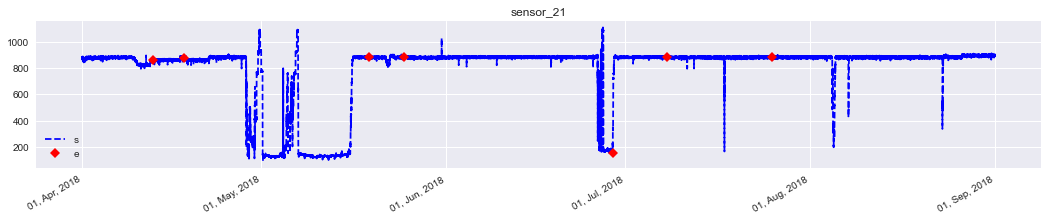

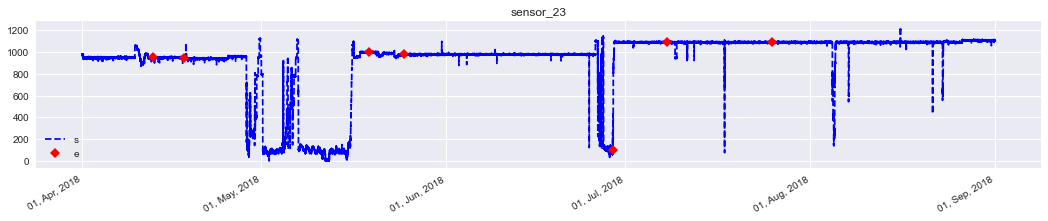

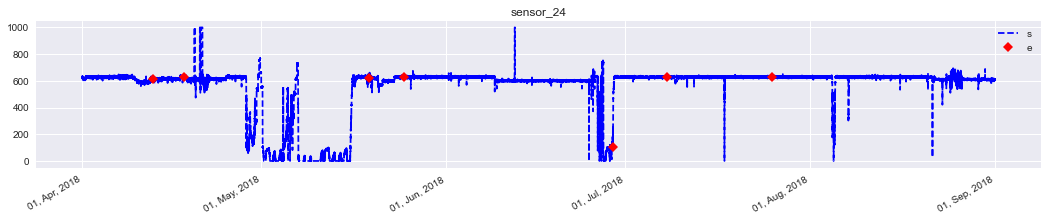

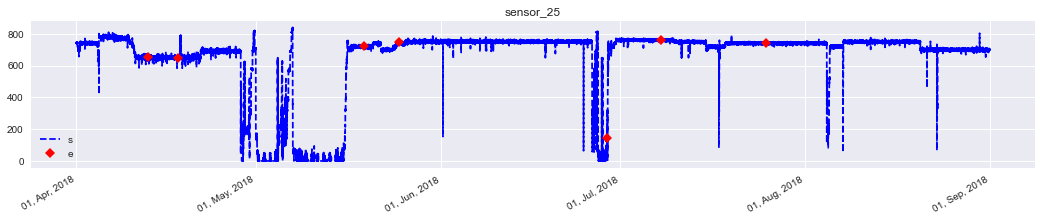

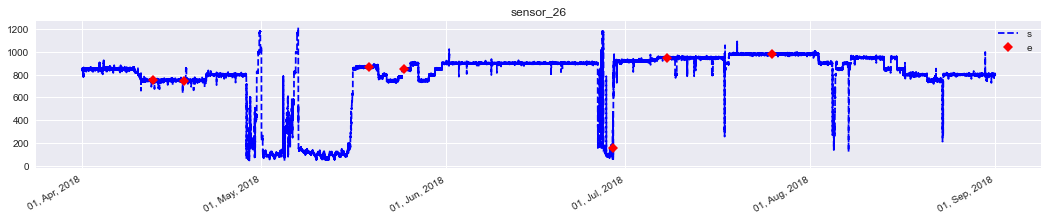

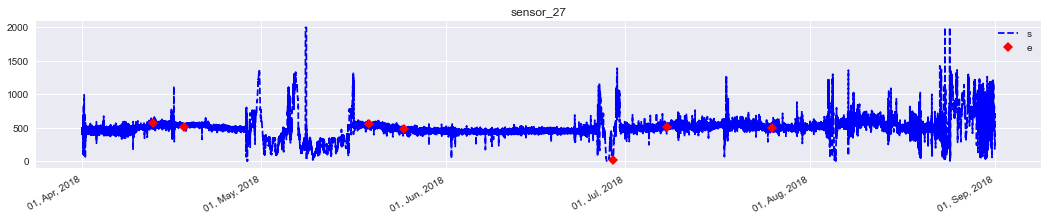

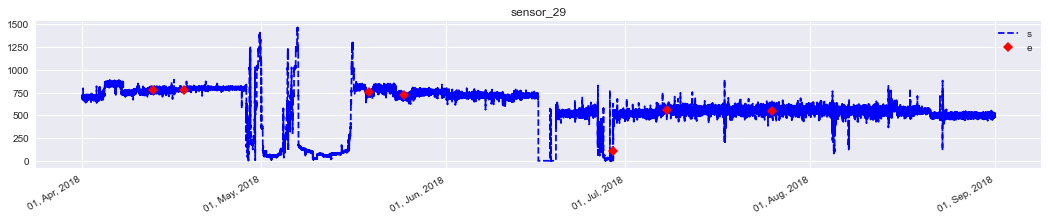

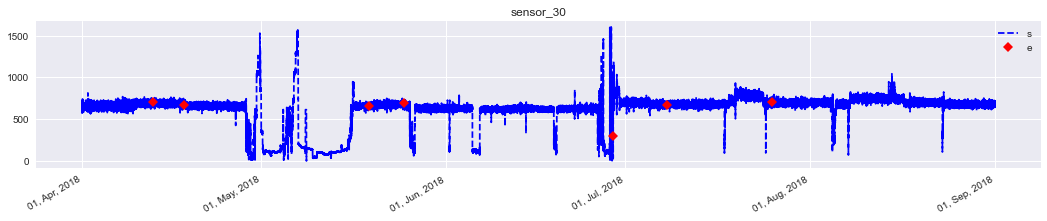

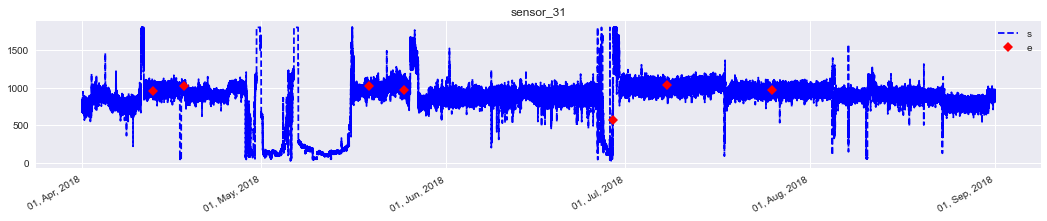

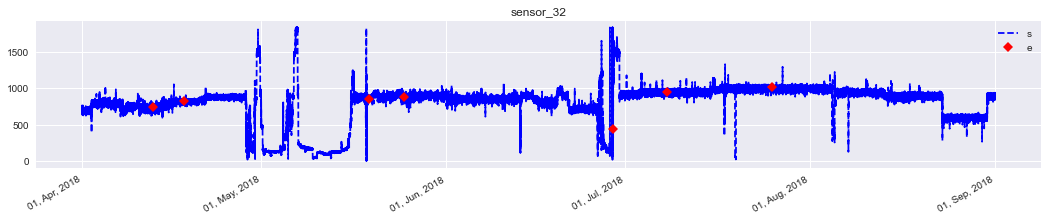

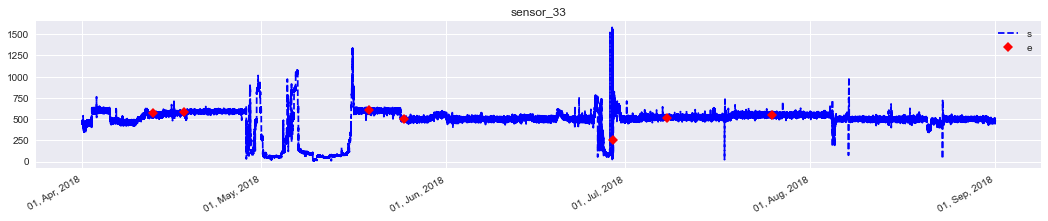

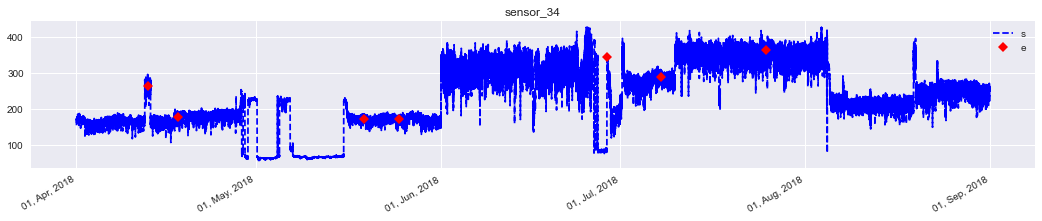

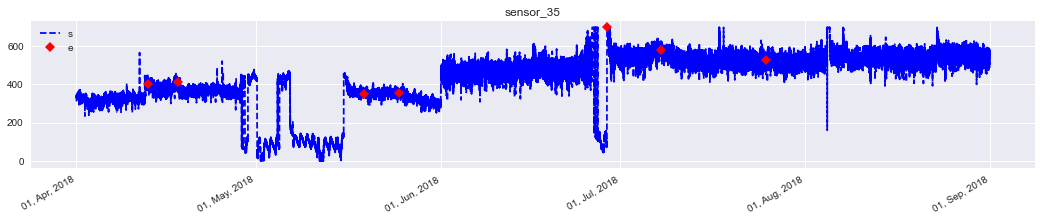

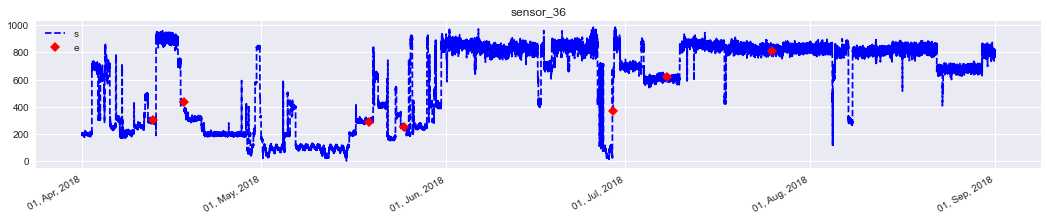

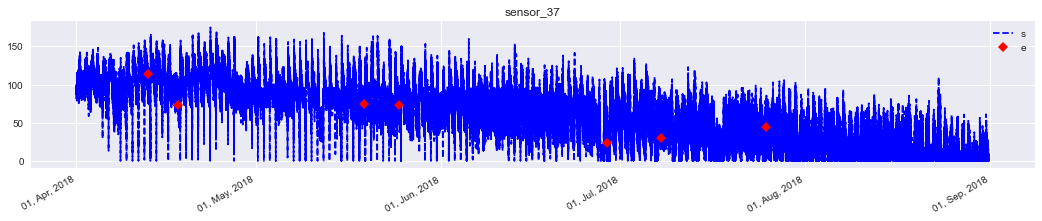

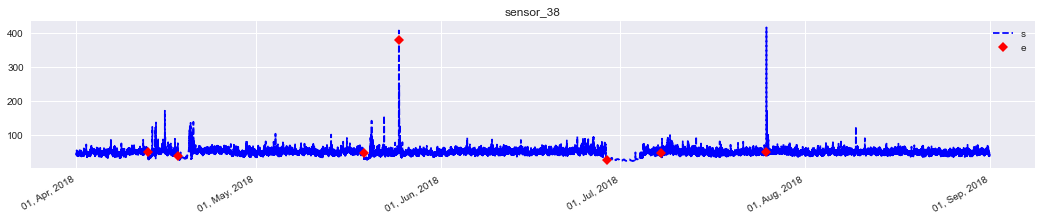

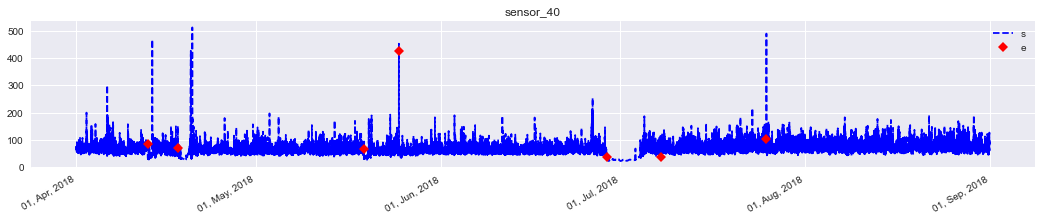

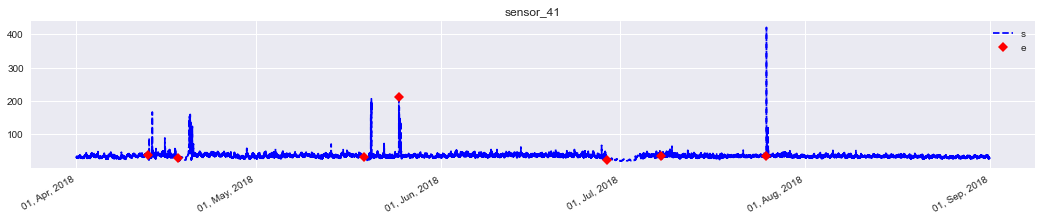

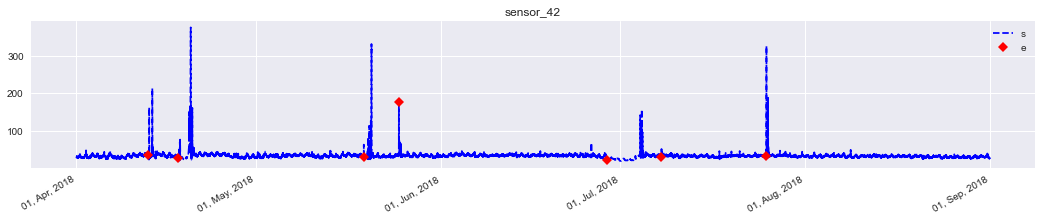

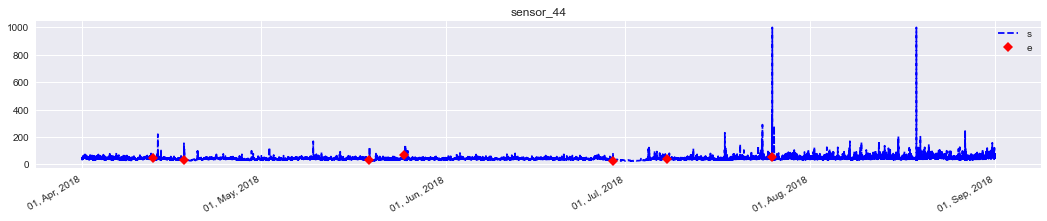

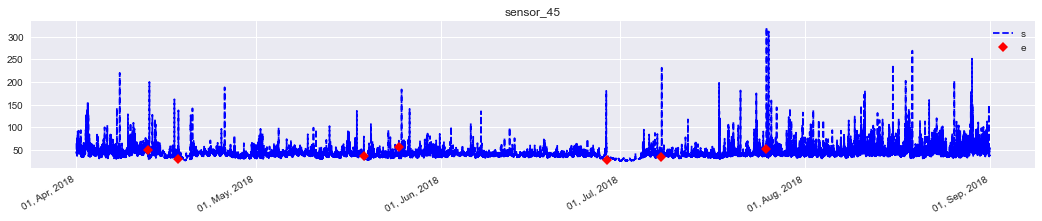

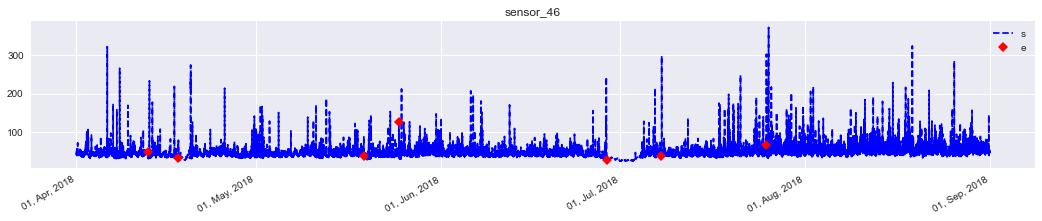

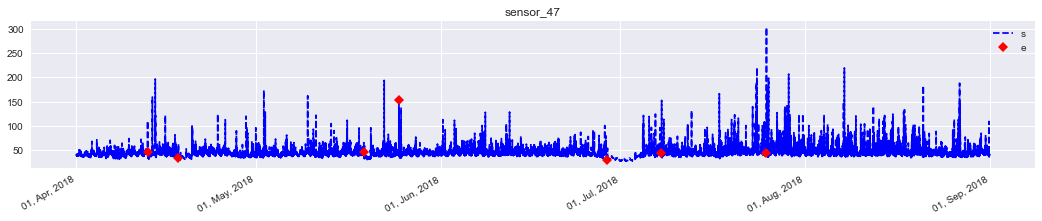

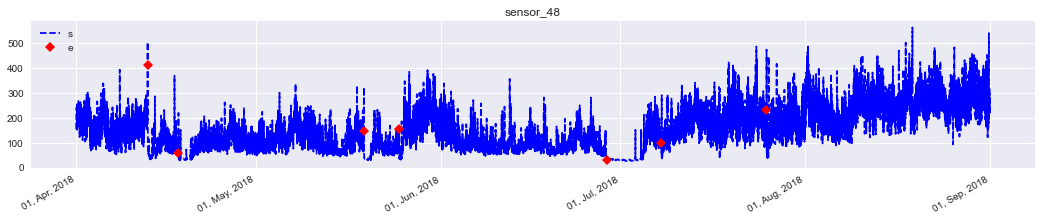

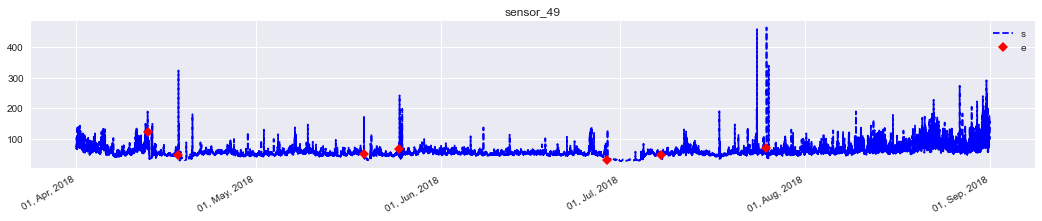

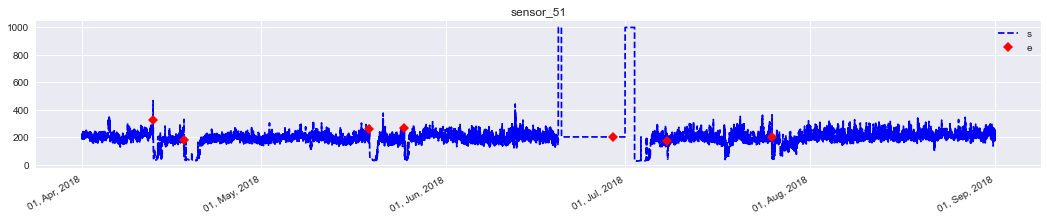

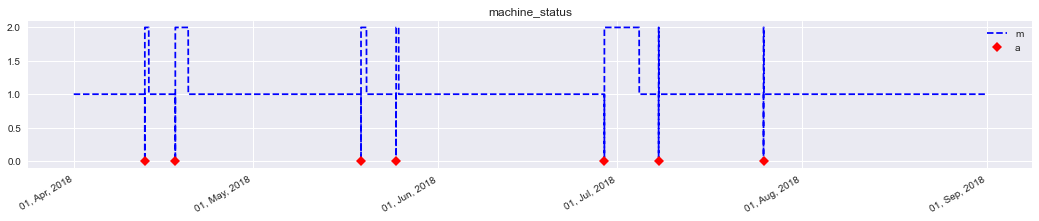

In [86]:
Broken = df[df['machine_status']==0]


df_Sensors = df.drop(['machine_status'], axis=1)
sensors=df.columns
for sensor in sensors:
    plt.style.use('seaborn')
    plt.figure(figsize=(18,3))
    plt.plot(df[sensor], color='blue',linestyle='--', zorder=1)
    plt.plot(Broken[sensor], linestyle='none', marker='D', color='red',zorder=2)
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.title(sensor)
    plt.legend(sensor)
    plt.show()

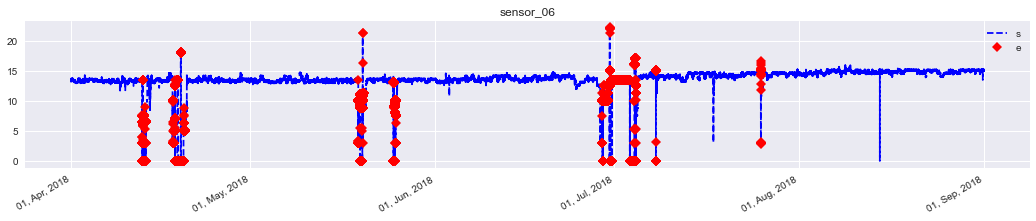

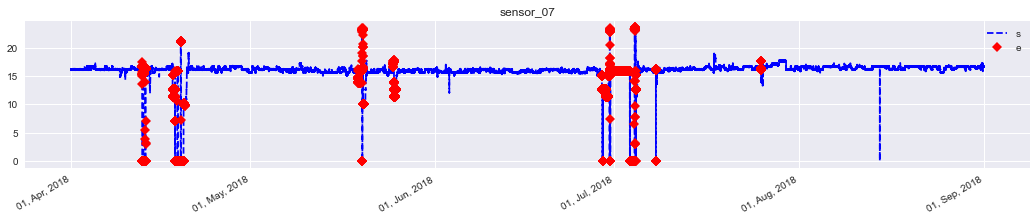

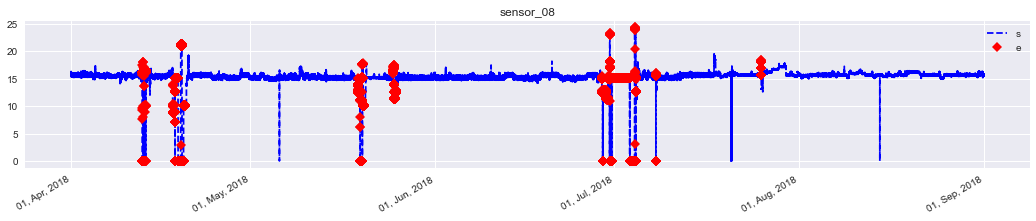

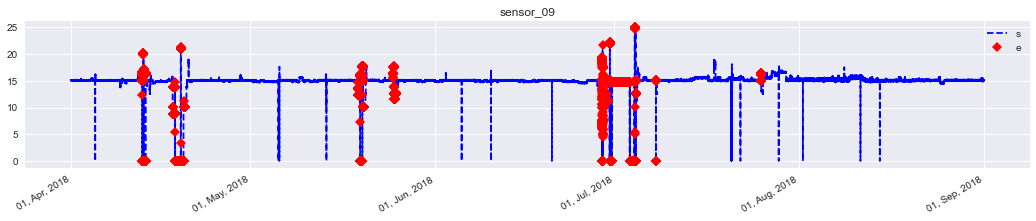

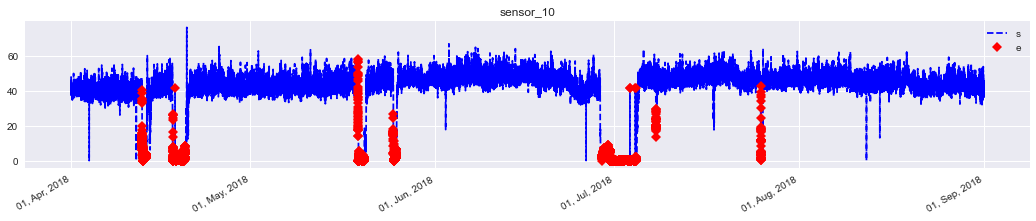

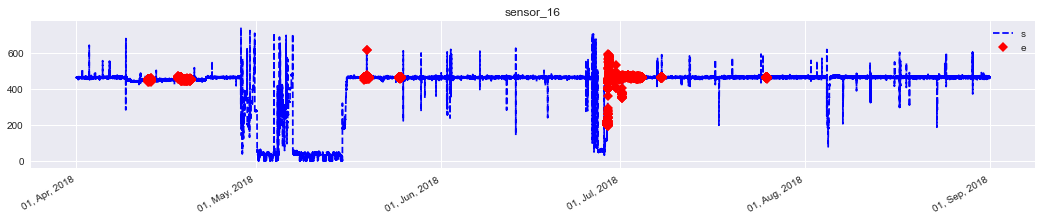

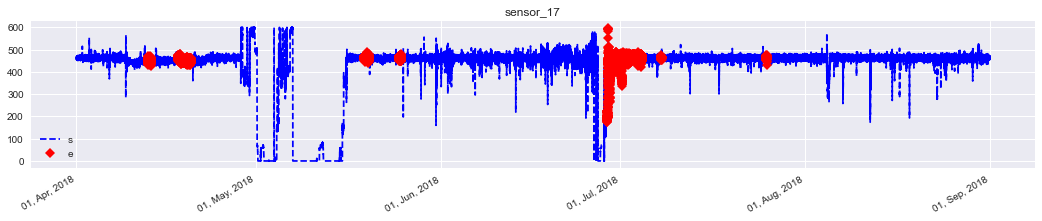

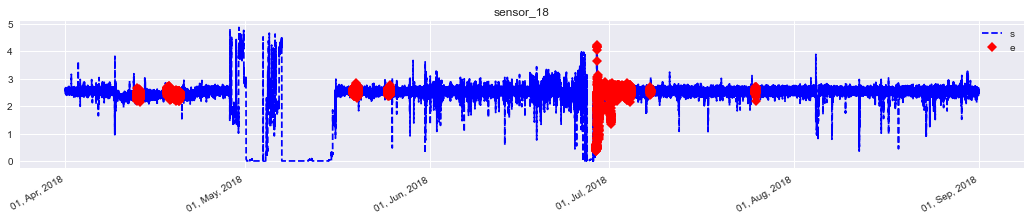

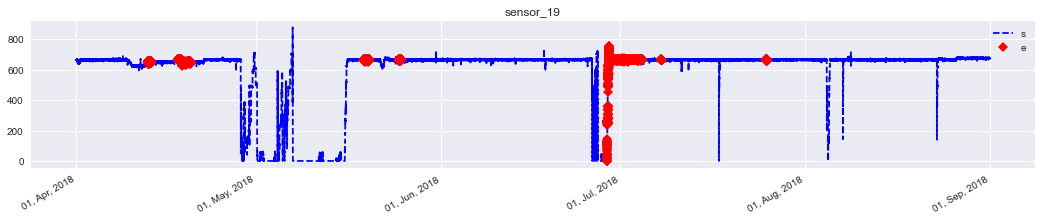

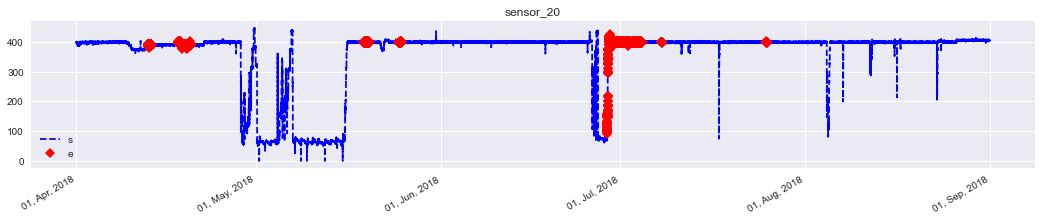

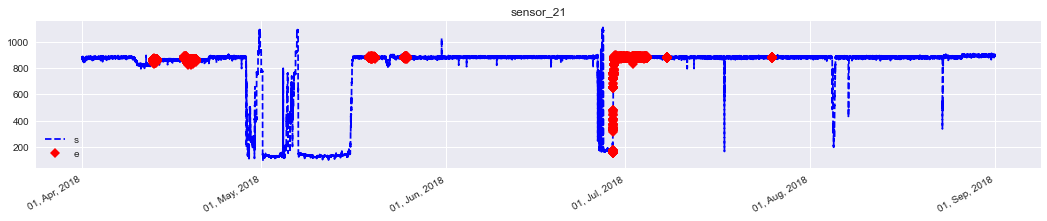

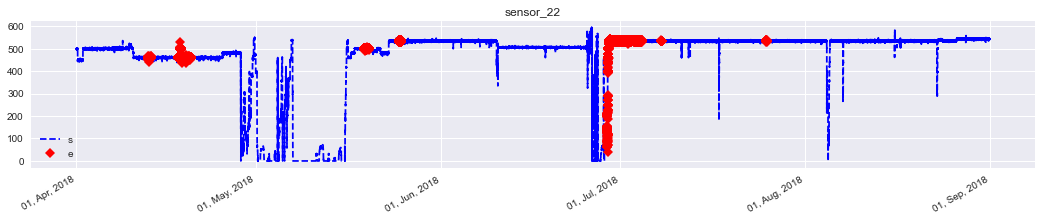

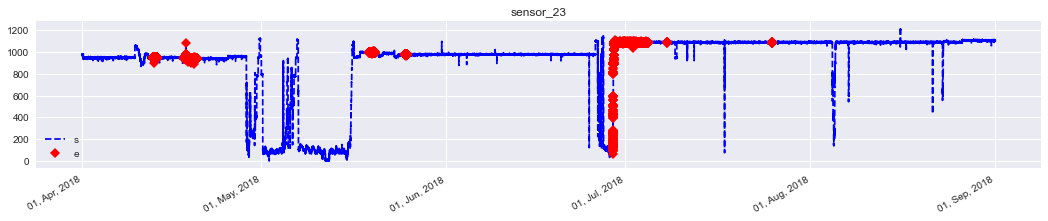

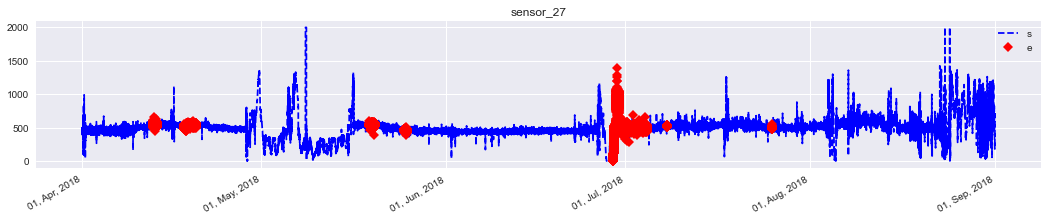

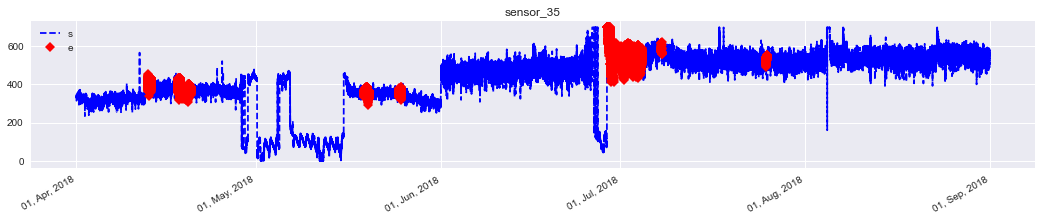

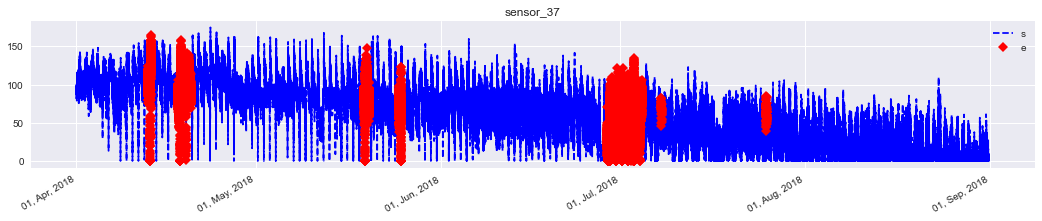

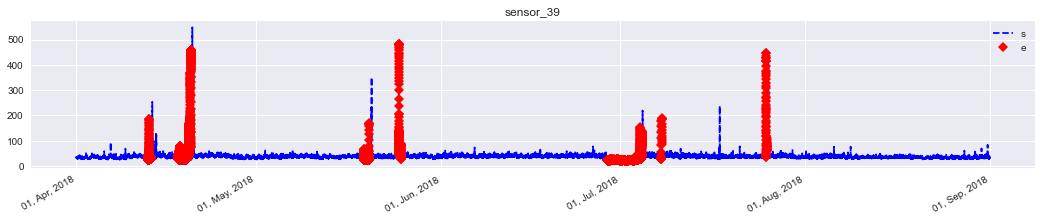

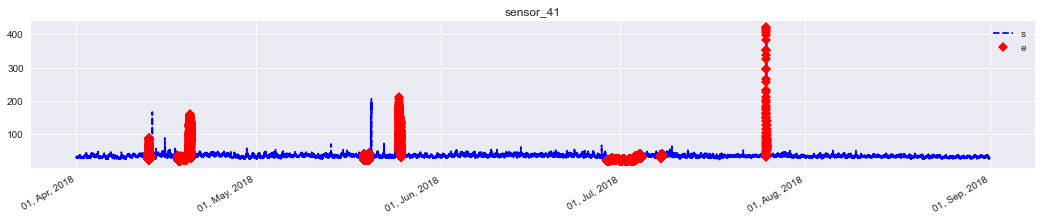

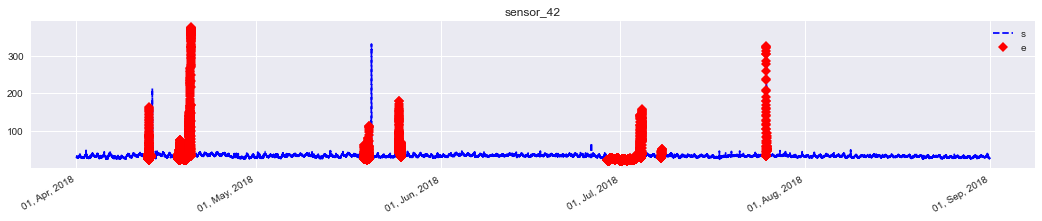

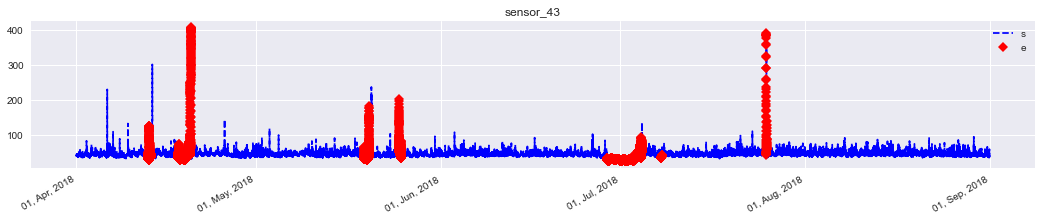

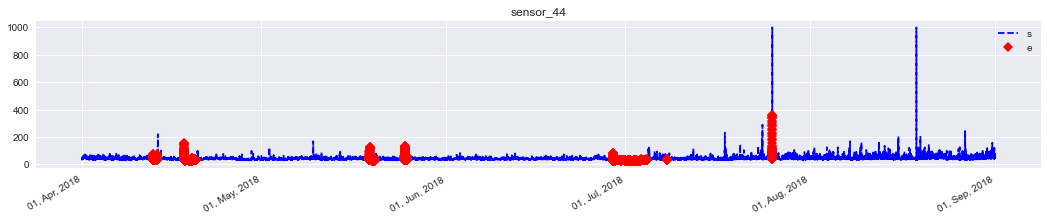

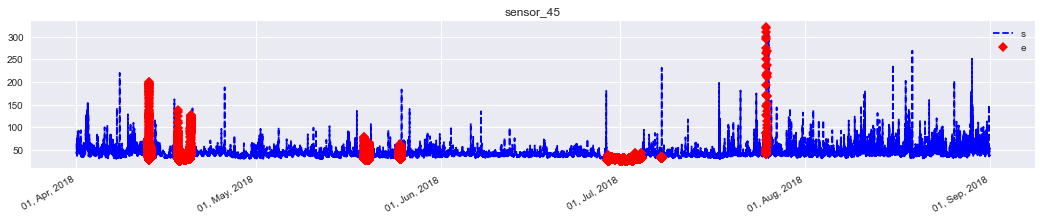

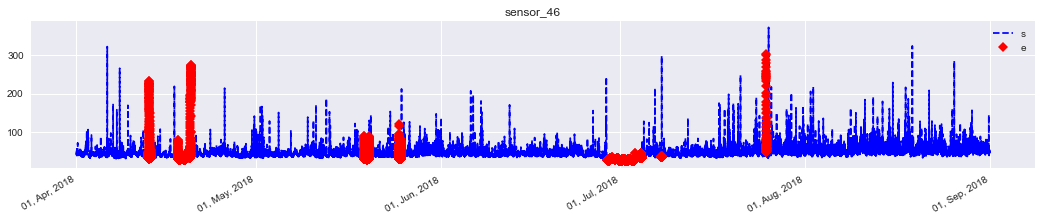

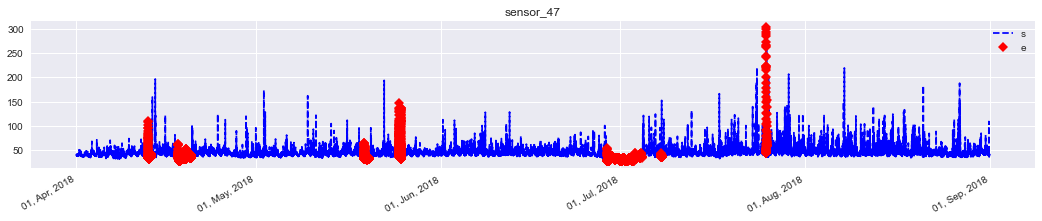

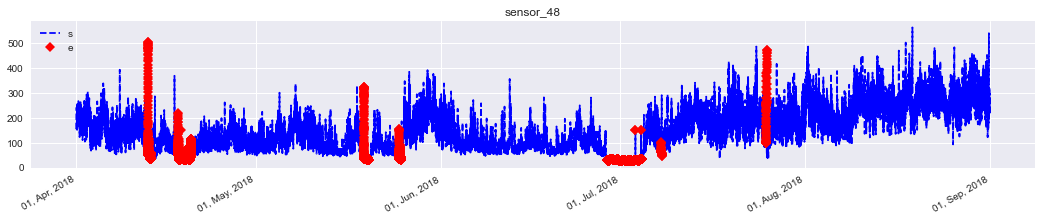

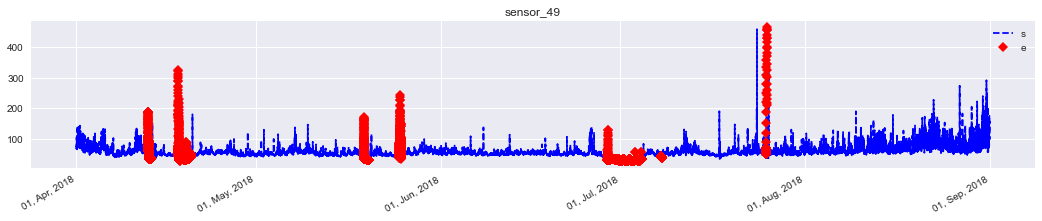

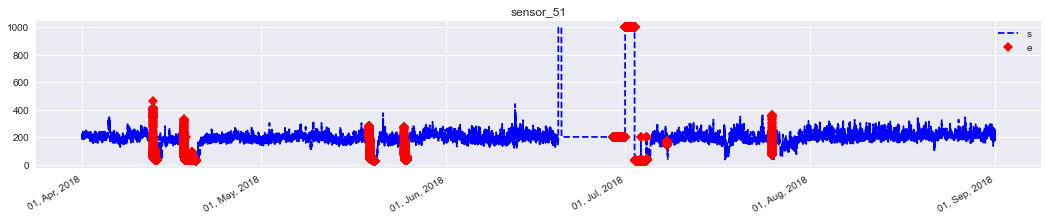

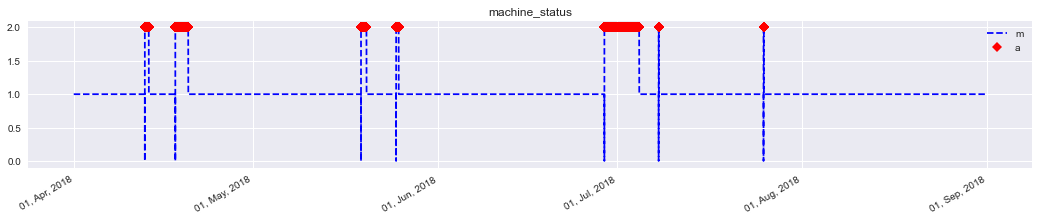

In [87]:
Recovering = df[df['machine_status']==2]
for sensor in sensors:
    plt.style.use('seaborn')
    plt.figure(figsize=(18,3))
    plt.plot(df[sensor], color='blue',linestyle='--', zorder=1)
    plt.plot(Recovering[sensor], linestyle='none', marker='D', color='red',zorder=2)
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.title(sensor)
    plt.legend(sensor)
    plt.show()

In [88]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df,column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(df, autolag='AIC')
    else:
        adf_test = adfuller(df[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

In [101]:
# adf_test_results = {
#     col: test_stationarity(df, col)
#     for col in df.columns} 